# Homework 1 Part 2

**Due: Monday, September 16, 11:59 PM**

This is an individual assignment.

## Description

Create or edit this Jupyter Notebook to answer the questions below. Use simulations to answer these questions. An analytical solution can be useful to check if your simulation is correct but analytical solutions alone will not be accepted as a solution to a problem.

In [3]:
import random
import numpy.random as npr
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Problem 7

Consider repeatedly rolling a fair 6-sided die.

1. Create a simulation to compute the probability that the top face will be 6 at least once on 3 rolls of the die?
2. Create a simulation to compute the probability that the top face will be 6 at least once on 6 rolls of the die?
3. Create a simulation to compute how many rolls of the die would you have to do to be 90% confident that you would see at least one 6?
4. Using the formula you have computed in problem 2 part 4, make a Python function that takes in the target value $p$ and outputs the required number of rolls of an integer. 
    1. Find the values for $p=0.95$ and $p=0.99$. 
    2. Use your simulation to verify that the number of rolls you specified is sufficient to achieve $p\geq 0.95$.

In [5]:
#Create a function to run the first two questions
def simulation(num_sims = 100_000, num_rolls = 3):
    die = npr.randint(1, 7, size = (num_rolls, num_sims))
    nr_six = np.sum(np.sum(die == 6, axis = 0) >= 1)
    print(f"Probability to get at least one 6 on {num_rolls} rolls {nr_six/num_sims}")
    return nr_six/num_sims

In [6]:
simulation(num_rolls = 3)
simulation(num_rolls = 6)

Probability to get at least one 6 on 3 rolls 0.42138
Probability to get at least one 6 on 6 rolls 0.66512


0.66512

In [7]:
# confident = 90%
num_sims = 100_000
threashold = 0.9
for sim in range(num_sims):
    prob = simulation(num_sims, sim)
    if prob >= threashold:
        rolls_needed = sim
        break
print(f"Number of rolls needed to reach a confidence of 90% is: {rolls_needed}")

Probability to get at least one 6 on 0 rolls 0.0
Probability to get at least one 6 on 1 rolls 0.16691
Probability to get at least one 6 on 2 rolls 0.30365
Probability to get at least one 6 on 3 rolls 0.42151
Probability to get at least one 6 on 4 rolls 0.51706
Probability to get at least one 6 on 5 rolls 0.60002
Probability to get at least one 6 on 6 rolls 0.66722
Probability to get at least one 6 on 7 rolls 0.72033
Probability to get at least one 6 on 8 rolls 0.76906
Probability to get at least one 6 on 9 rolls 0.80411
Probability to get at least one 6 on 10 rolls 0.83854
Probability to get at least one 6 on 11 rolls 0.86661
Probability to get at least one 6 on 12 rolls 0.88734
Probability to get at least one 6 on 13 rolls 0.90558
Number of rolls needed to reach a confidence of 90% is: 13


In [8]:
# Use formula found in HW1 PROBLEM 1
def needed_rolls(x):
    a = np.ceil(np.log(1-x)/np.log(5/6))
    print(f"For given p {x}, there are {a} rolls needed.")
    return a

needed_rolls(0.95)
needed_rolls(0.99)

# to verify
simulation(num_rolls = 18)

For given p 0.95, there are 17.0 rolls needed.
For given p 0.99, there are 26.0 rolls needed.
Probability to get at least one 6 on 18 rolls 0.9622


0.9622

## Problem 8

Create a simulation function where you will roll a fair 6-sided die 20 times and count the number of times the face $x$ comes up on the top face of the die. 

* In your simulation, create a list that will store the number of times it came up $x$ on the top face of the die.
* Create a plot of unique counts vs their relative frequency

Using your simulation function, run it for:

1. $x=3$

2. $x=[5,6]$, that is, probability of observing a 5 or a 6 on the top face.

3. $x=[1,2,3]$, that is, probability of observing a 1, 2 or 3 on the top face.

For both cases, comment the plotting results. For a *sufficient* amount of simulations, does it behave as *expected*?

In [10]:
def num_count(x, rolls = 20, num_sims=100_000):
    # empty array 
    arr = np.zeros(rolls)
    for sim in range(num_sims):
        die = random.choices(range(1,7), k = rolls)
        # not working when doing times = die.count(x)
        times = sum(die.count(num) for num in x)
        arr[times] += 1
    return arr, arr/num_sims

Text(0, 0.5, 'Relative Frequency')

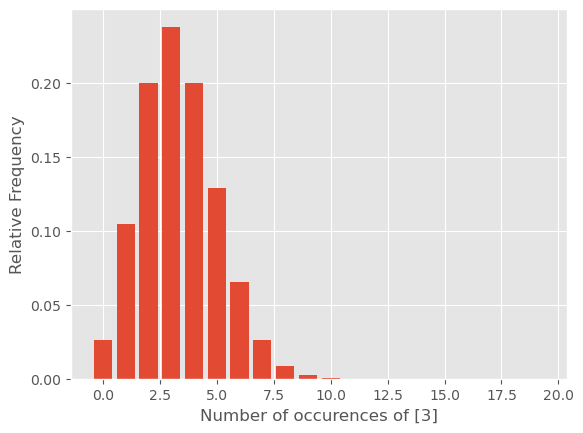

In [11]:
x = [3]
arr, freq = num_count(x)
plt.bar(np.arange(len(freq)), freq)
plt.xlabel(f"Number of occurences of {x}")
plt.ylabel('Relative Frequency')

**The graph above is as expected from the hand calculations. Only one outcome from a fair 6-sixed die and a total of 20 rolls. Probability is 20(1/6) = 3.333**

Text(0, 0.5, 'Relative Frequency')

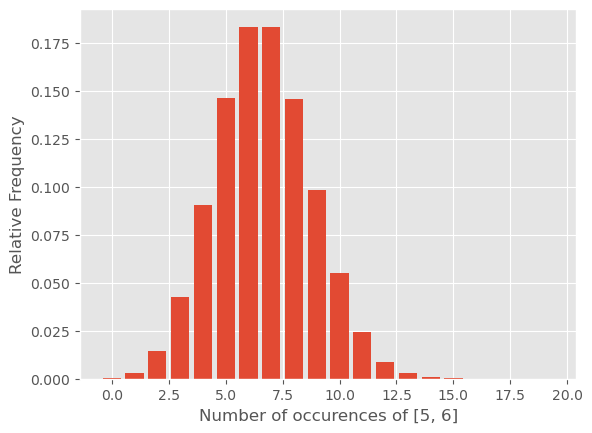

In [13]:
x = [5, 6]
arr, freq = num_count(x)
plt.bar(np.arange(len(freq)), freq)
plt.xlabel(f"Number of occurences of {x}")
plt.ylabel("Relative Frequency")

**The graph above is as expected from the hand calculations. Only two outcomes from a fair 6-sixed die and a total of 20 rolls. Probability is 20(2/6) = 6.6667**

Text(0, 0.5, 'Relative Frequency')

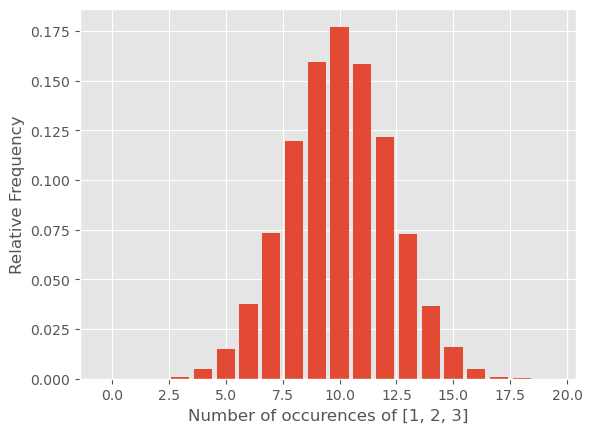

In [17]:
x = [1, 2, 3]
arr, freq = num_count(x)
plt.bar(np.arange(len(freq)), freq)
plt.xlabel(f"Number of occurences of {x}")
plt.ylabel("Relative Frequency")

**The graph above is as expected from the hand calculations. Only three outcome from a fair 6-sixed die and a total of 20 rolls. Probability is 20(3/6) = 10**

## Problem 9

Suppose that you have a bag with 3 coins. One of them is a fair coin, but the others are biased trick coins. When flipped, the three coins come up heads with probability $\frac{1}{2}$, $\frac{2}{3}$, and $\frac{1}{5}$, respectively.

Consider the experiment where you pick one coin at random and flip it three times. Let $H_i$ be the event that the coin comes up heads on flip $i$. What is the probability of the outcome $H_1\cap H_2\cap \overline{H_3}$?

In [19]:
coins = ['fair', 'biased1', 'biased2']
num_sims = 100_000
count = 0
for sim in range(num_sims):
    coin = random.choice(coins)
    if (coin == 'fair'):
        S = ['H', 'T']
    elif (coin == 'biased1'):
        S = ['H', 'H', 'T']
    else:
        S = ['H', 'T', 'T', 'T',' T']
        
    value = random.choices(S, k = 3)
    if value[0] == 'H':
        if value[1] == 'H':
            if value[2] == 'T':
                count += 1

# formula for probability found by hand
a = 0.5**3*(1/3) + (2/3)**2*(1/3)**2 + (1/5)**2*(4/5)*(1/3)
print(f"The probability for having head in the first and second flip but not the third is {count/num_sims}")
print(f"The probability calculated by hand is {a:.5f}")

The probability for having head in the first and second flip but not the third is 0.09874
The probability calculated by hand is 0.10172


## Problem 10

In what follows, apply a significance value $\alpha = 0.01$. That is, there must be less than a 1% probability of seeing such an extreme value under the null hypothesis before we are willing to conclude that the null hypothesis is not reasonable.

* If a 6-sided die is rolled 10 times and all the values are <=4, should we feel confident that the die is not fair (i.e., reject the null hypothesis with $p=0.01$)?

* Conduct the above simulation using a python function.

In [21]:
num_sims = 100_000
die = npr.randint(1, 7, size = (10, num_sims))
less_than_4 = np.sum(np.sum(die <= 4, axis = 0) == 10)
print(f"Probability that all values are <=4 for 10 rolls is {less_than_4/num_sims}")

Probability that all values are <=4 for 10 rolls is 0.01703


**From the answer above the null hypothesis is not rejected.**

## Problem 11

Consider the experiment where you pick 3 cards at random from a deck of 52 playing cards (13 cards per suit) **without replacement**, i.e., at each card selection you will not put it back in the deck, and so the number of possible outcomes will change for each new draw.

Let $D_i$ denote the event the card is diamonds in the $i$th draw.

Build a simulation to compute the following probabilities:

1. $P(D_1)$

2. $P(D_1 \cap D_2)$

3. $P(D_1 \cap D_2 \cap \overline{D_3})$

4. $P(D_3 \cup D_2|D_1 )$

5. $P(D_3|D_1\cap D_2)$

*Note: to sample from a set **without replacement**, consider use the function ```numpy.random.choice``` by controling the parameter ```replace```*.

In [23]:
num_sims = 100_000
cards = ['Heart', 'Diamond', 'Spade', 'Club'] * 13
count_D1 = 0
for sim in range(num_sims):
    card = np.random.choice(cards, 3, False)
    if card[0] == 'Diamond':
        count_D1 += 1
print(f"Probability of getting diamond in the first draw is {count_D1/num_sims}")

Probability of getting diamond in the first draw is 0.25251


In [24]:
num_sims = 100_000
cards = ['Heart', 'Diamond', 'Spade', 'Club'] * 13
count_D1 = 0
count_D1D2 = 0
for sim in range(num_sims):
    card = np.random.choice(cards, 3, False)
    if card[0] == 'Diamond':
        count_D1 += 1
        if card[1] == 'Diamond':
            count_D1D2 += 1
print(f"Probability of getting diamond in the first  and second draw is {count_D1D2/num_sims}")

Probability of getting diamond in the first  and second draw is 0.05879


In [25]:
num_sims = 100_000
cards = ['Heart', 'Diamond', 'Spade', 'Club'] * 13
count_D1 = 0
count_D2 = 0
count_D1D2_notD3 = 0
for sim in range(num_sims):
    card = np.random.choice(cards, 3, False)
    if card[0] == 'Diamond':
        count_D1 += 1
        if card[1] == 'Diamond':
            count_D2 += 1
            if card[2] != 'Diamond': 
                count_D1D2_notD3 += 1
print(f"Probability of getting diamond in the first  and second draw but not the third draw is {count_D1D2_notD3/num_sims}")

Probability of getting diamond in the first  and second draw but not the third draw is 0.04546


In [26]:
num_sims = 100_000
cards = ['Heart', 'Diamond', 'Spade', 'Club'] * 13
count_D1 = 0
count_D2D1 = 0
count_D3D1 = 0
for sim in range(num_sims):
    card = np.random.choice(cards, 3, False)
    if card[0] == 'Diamond':
        count_D1 += 1
        if card[1] == 'Diamond':
            count_D2D1 += 1
        if card[2] == 'Diamond':
            count_D3D1 += 1
print(f"Probability for the fourth part is {(count_D3D1/count_D1)+(count_D2D1/count_D1):.6f}")

Probability for the fourth part is 0.467138


In [27]:
num_sims = 100_000
cards = ['Heart', 'Diamond', 'Spade', 'Club'] * 13
count_D1 = 0
count_d1D2 = 0
count_D1D2D3 = 0
for sim in range(num_sims):
    card = np.random.choice(cards, 3, False)
    if card[0] == 'Diamond':
        count_D1 += 1
        if card[1] == 'Diamond':
            count_D1D2 += 1
            if card[2] == 'Diamond':
                count_D1D2D3 += 1
print(f"Probability of getting diamond in the third draw given that we get diamond in the first and second draw is {count_D1D2D3/count_D2:.6f}")

Probability of getting diamond in the third draw given that we get diamond in the first and second draw is 0.218569


## Problem 12

Suppose that you have 6 coins: 2 fair coins and 4 unfair coins. When flipped, the coins flip heads with probability 0.5, 0.5, 0.8, 0.2, 0.1 and 0.3, respectively. Consider the experiment where you choose a coin at random and flip it for three times. Let $E$ be the event that 3 heads were observed. Compute $P(\text{fair coin}|E)$.

*Note: to encode specific probabilily of flipping heads, you may consider using the function ```numpy.random.choice``` by controlling the parameter ```p```.*

In [33]:
num_sims = 100_000
coins = ['fair', 'fair', 'unfair1', 'unfair2', 'unfair3', 'unfair4']
head = 0
count = 0
for sim in range(num_sims):
    coin = random.choice(coins)
    if coin == 'fair':
        S = ['H', 'T']
    elif (coin == 'unfair1'):
        S = ['H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'T', 'T']
    elif (coin == 'unfair2'):
        S = ['H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
    elif (coin == 'unfair3'):
        S = ['H', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
    else:
        S = ['H', 'H', 'H', 'T', 'T', 'T', 'T', 'T', 'T', 'T']
    value = random.choices(S, k = 3)
    if value.count('H') == 3:
        head += 1
        if coin == 'fair':
            count += 1
print(f"The probability to flip a coin three times and get three heads given that the coin is fair (conditional probability) is {count/head:.5f}.")

The probability to flip a coin three times and get three heads given that the coin is fair (conditional probability) is 0.31525.


# Submission Instructions:

When you are done with the exercises in this notebook, upload a PDF or your results to Canvas.  To create the PDF with your code and results, you can use the following procedure:

1. Go to Kernel
2. Click Restart and Run All
3. Check over the notebook to make sure everything still looks right

**At this point, you may be able to just choose "Print" from JupyterLab's File menu and then print to PDF (OS dependent). If everything is correct in the PDF version, then upload that PDF to the assignment in Canvas.**

**If your PDF is missing any of your outputs, you can use the following procedure:**

4. Next, click File at the top on the tool bar below Jupyter icon
5. Click Save and Export Notebook as... and choose HTML
6. The HTML file will either open in a new tab/window or be downloaded to your Downloads folder. Open it if it is in the Downloads folder
7. Print the HTML file to PDF (how to do this is OS dependent). Make sure to save it to somewhere you can find it
8. Open the PDF to make sure that everything looks right and that nothing is cut off
9. Upload both the PDF and ipynb files to the Canvas assignment